In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)

# 1. Boxplot for Median value of owner-occupied homes

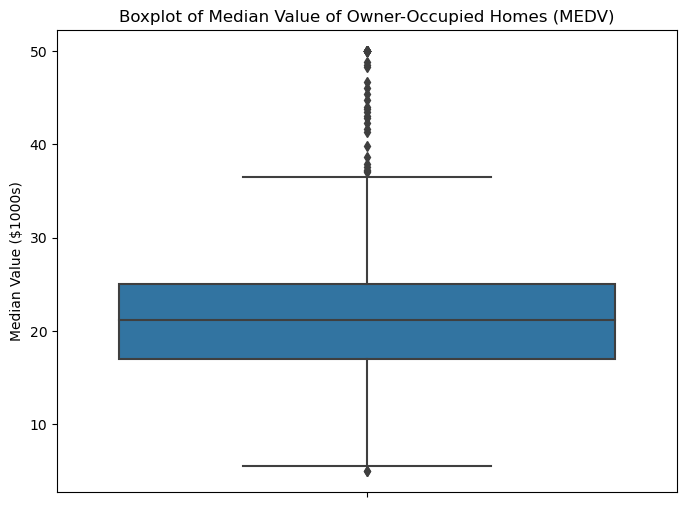

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value ($1000s)')
plt.show()

Explanation: This boxplot shows the distribution of MEDV, highlighting the median, quartiles, and potential outliers.


# 2. Bar plot for CHAS 

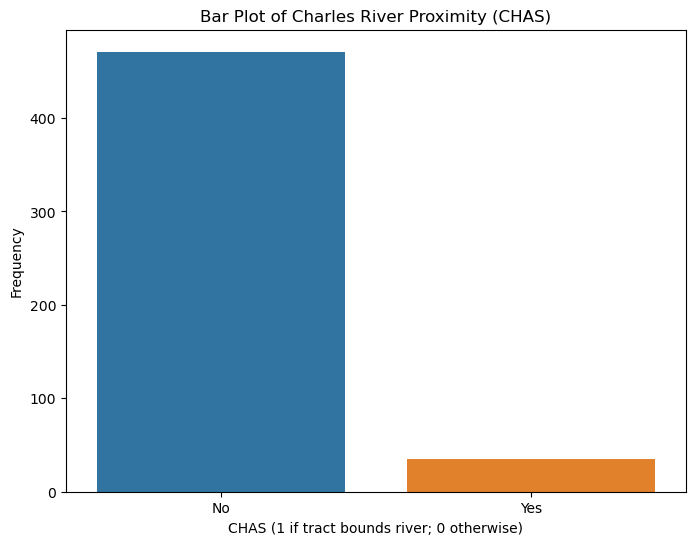

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot of Charles River Proximity (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Explanation: This bar plot shows the frequency of properties bordering the Charles River versus those that don't.

# 3. Boxplot of MEDV vs. AGE (discretized)

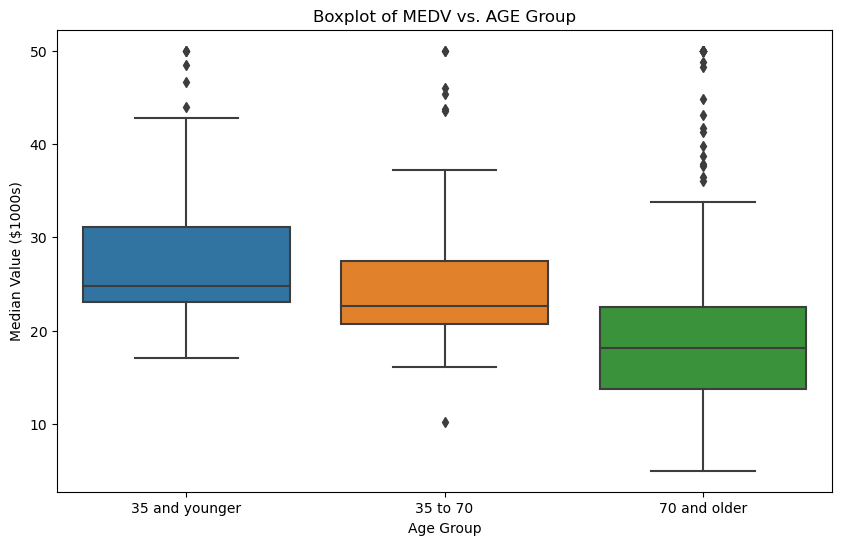

In [6]:
bins = [0, 35, 70, float('inf')]
labels = ['35 and younger', '35 to 70', '70 and older']
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV vs. AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

Explanation: This boxplot compares the distribution of MEDV across different age groups of properties.

# 4. Scatter plot of Nox vs. Indus

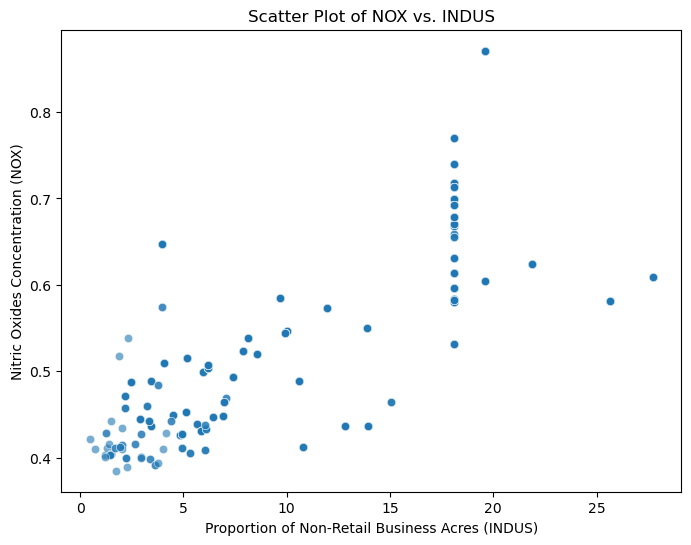

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Indus', y='Nox', data=boston_df, alpha=0.6)
plt.title('Scatter Plot of Nox vs. Indus')
plt.xlabel('Proportion of Non-Retail Business Acres (Indus)')
plt.ylabel('Nitric Oxides Concentration (Nox)')
plt.show()

Explanation: This scatter plot visualizes the relationship between NOX concentration and the proportion of non-retail business acres.
Observation: There appears to be a positive correlation.

# 5. Histogram for PTRATIO (Pupil-teacher ratio)

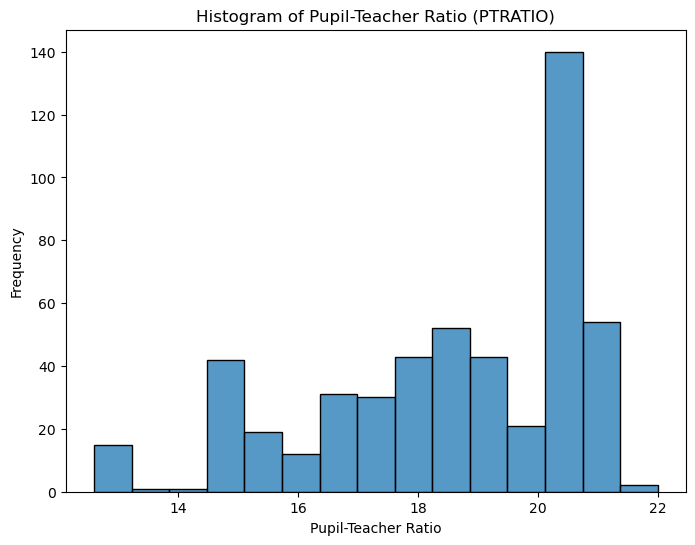

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False, edgecolor='black')
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

Explanation: This histogram shows the distribution of pupil-teacher ratios across the towns.

# 6. Null and Alternate Hypothesis (for regression - example using DIS and MEDV)

In [9]:
# We'll use DIS (weighted distances to employment centers) as an example.
# In a real analysis, you'd include other relevant variables.

X = boston_df[['DIS']]  # Independent variable (DIS)
y = boston_df['MEDV']   # Dependent variable (MEDV)
X = sm.add_constant(X)  # Add a constant (intercept)

model = sm.OLS(y, X).fit()

print(model.summary())

# Extract the coefficient and p-value for DIS
dis_coefficient = model.params['DIS']
dis_p_value = model.pvalues['DIS']

print(f"DIS Coefficient: {dis_coefficient}")
print(f"DIS P-value: {dis_p_value}")


# Null Hypothesis (H0): The coefficient of DIS is zero (no relationship between DIS and MEDV).
# Alternate Hypothesis (H1): The coefficient of DIS is not zero (there is a relationship).

# Example Interpretation (replace with your actual results):
if dis_p_value < 0.05:  # Check for statistical significance (adjust alpha as needed)
    print("The relationship between DIS and MEDV is statistically significant.")
    if dis_coefficient > 0:
        print(f"For each additional unit of DIS, MEDV is estimated to increase by ${dis_coefficient:.2f}.")
    else:
        print(f"For each additional unit of DIS, MEDV is estimated to decrease by ${abs(dis_coefficient):.2f}.")
else:
    print("The relationship between DIS and MEDV is not statistically significant.")



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        18:02:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# 7. Conclusions 

In [10]:
print("\nConclusions:")
print("The analysis explored several aspects of the Boston housing dataset, including the distribution of median home values, the proportion of properties near the Charles River, the relationship between home value and age, the correlation between nitric oxide concentration and industrial areas, and the distribution of pupil-teacher ratios.  A preliminary regression analysis suggests that distance to employment centers (DIS) may have a statistically significant impact on median home values, but further analysis with additional variables is needed to draw more robust conclusions.  The scatter plot indicated a positive correlation between NOX and INDUS, supporting the expectation that industrial areas tend to have higher pollution levels.  Further investigation could explore the specific factors contributing to high home values and the impact of other environmental and socioeconomic variables.")


Conclusions:
The analysis explored several aspects of the Boston housing dataset, including the distribution of median home values, the proportion of properties near the Charles River, the relationship between home value and age, the correlation between nitric oxide concentration and industrial areas, and the distribution of pupil-teacher ratios.  A preliminary regression analysis suggests that distance to employment centers (DIS) may have a statistically significant impact on median home values, but further analysis with additional variables is needed to draw more robust conclusions.  The scatter plot indicated a positive correlation between NOX and INDUS, supporting the expectation that industrial areas tend to have higher pollution levels.  Further investigation could explore the specific factors contributing to high home values and the impact of other environmental and socioeconomic variables.
